In [1]:
import cv2
from PIL import Image

In [17]:
# cv2.imread() method loads an image from the specified file.

# Syntax: cv2.imread(path, flag)

# Parameters:
# path: A string representing the path of the image to be read.
# flag: It specifies the way in which image should be read. It’s default value is cv2.IMREAD_COLOR

# Return Value: This method returns an image that is loaded from the specified file.


# All three types of flags are described below:

# cv2.IMREAD_COLOR: It specifies to load a color image. Any transparency of image will be neglected. It is the default flag. Alternatively, we can pass integer value 1 for this flag.
# cv2.IMREAD_GRAYSCALE: It specifies to load an image in grayscale mode. Alternatively, we can pass integer value 0 for this flag.
# cv2.IMREAD_UNCHANGED: It specifies to load an image as such including alpha channel. Alternatively, we can pass integer value -1 for this flag.

In [12]:
clear_img = cv2.imread('clear_image.jpg', flags=cv2.IMREAD_GRAYSCALE)
clear_img

array([[206, 206, 206, ..., 185, 185, 185],
       [206, 206, 206, ..., 185, 185, 185],
       [206, 206, 206, ..., 186, 185, 185],
       ...,
       [207, 207, 207, ..., 191, 190, 190],
       [207, 207, 207, ..., 191, 190, 190],
       [207, 207, 207, ..., 191, 191, 190]], dtype=uint8)

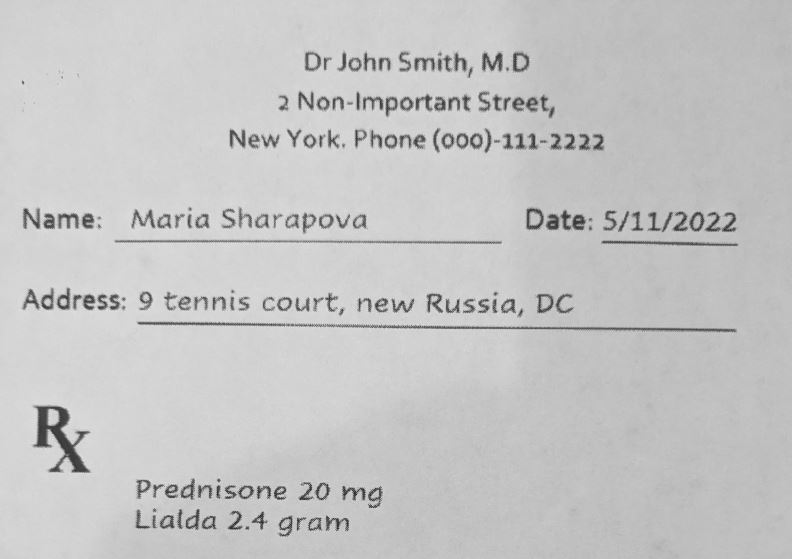

In [13]:
Image.fromarray(clear_img)

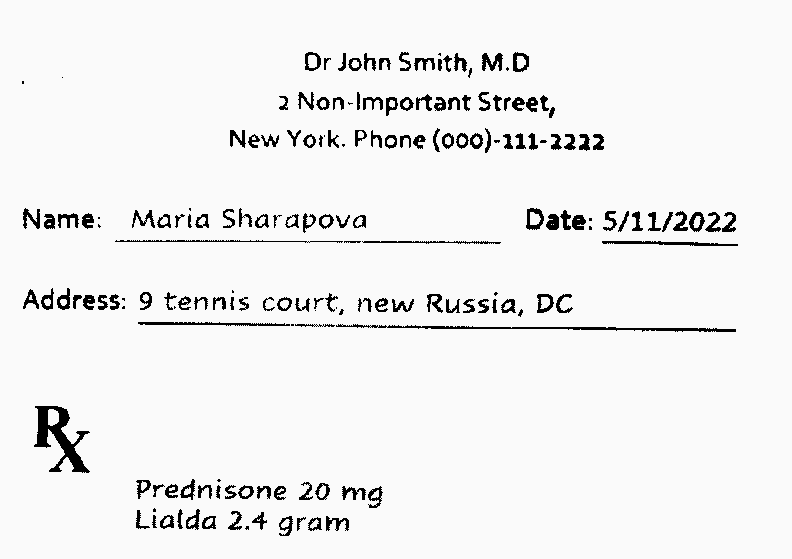

In [14]:
# Simple Thresholding

_, new_img = cv2.threshold(clear_img,150,250,cv2.THRESH_BINARY)

Image.fromarray(new_img)

In [18]:
dark_img = cv2.imread('dark_image.jpg', flags=cv2.IMREAD_GRAYSCALE)
dark_img

array([[206, 206, 206, ..., 187, 186, 184],
       [206, 206, 206, ..., 186, 185, 185],
       [206, 206, 206, ..., 186, 185, 185],
       ...,
       [162, 157, 152, ..., 184, 184, 184],
       [160, 156, 152, ..., 184, 184, 184],
       [156, 158, 158, ..., 184, 184, 184]], dtype=uint8)

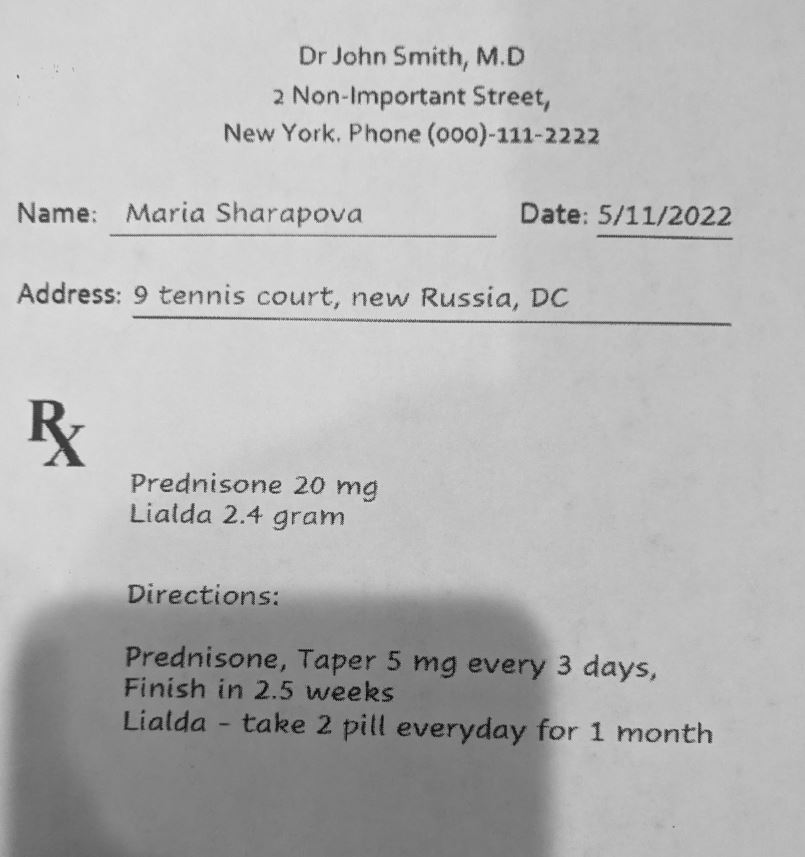

In [19]:
Image.fromarray(dark_img)

In [23]:
# Thresholding is a technique in OpenCV, which is the assignment of pixel values in relation to the threshold value provided. 
# In thresholding, each pixel value is compared with the threshold value. If the pixel value is smaller than the threshold, 
# it is set to 0(BLACK), otherwise, it is set to a maximum value (generally 255(WHITE)). 

# Thresholding is a very popular segmentation technique, used for separating an object considered as a foreground from its background. 
# A threshold is a value which has two regions on its either side i.e. below the threshold or above the threshold. 

# In Computer Vision, this technique of thresholding is done on grayscale images. 
# So initially, the image has to be converted in grayscale color space. 

'''
If f (x, y) < T 
   then f (x, y) = 0 
else 
   f (x, y) = 255

where 
f (x, y) = Coordinate Pixel Value
T = Threshold Value.
'''

'''
Syntax: cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique) 
Parameters: 
-> source: Input Image array (must be in Grayscale). 
-> thresholdValue: Value of Threshold below and above which pixel values will change accordingly. 
-> maxVal: Maximum value that can be assigned to a pixel. 
-> thresholdingTechnique: The type of thresholding to be applied.  
'''


# Simple Thresholding
# ---------------------
# The basic Thresholding technique is Binary Thresholding. For every pixel, the same threshold value is applied. 
# If the pixel value is smaller than the threshold, it is set to 0, otherwise, it is set to a maximum value.

# The different Simple Thresholding Techniques are:  

# cv2.THRESH_BINARY: If pixel intensity is greater than the set threshold, value set to 255, else set to 0 (black).
# cv2.THRESH_BINARY_INV: Inverted or Opposite case of cv2.THRESH_BINARY.
# cv.THRESH_TRUNC: If pixel intensity value is greater than threshold, it is truncated to the threshold. The pixel values are set to be the same as the threshold. All other values remain the same.
# cv.THRESH_TOZERO: Pixel intensity is set to 0, for all the pixels intensity, less than the threshold value.
# cv.THRESH_TOZERO_INV: Inverted or Opposite case of cv2.THRESH_TOZERO.

'\nSyntax: cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique) \nParameters: \n-> source: Input Image array (must be in Grayscale). \n-> thresholdValue: Value of Threshold below and above which pixel values will change accordingly. \n-> maxVal: Maximum value that can be assigned to a pixel. \n-> thresholdingTechnique: The type of thresholding to be applied.  \n'

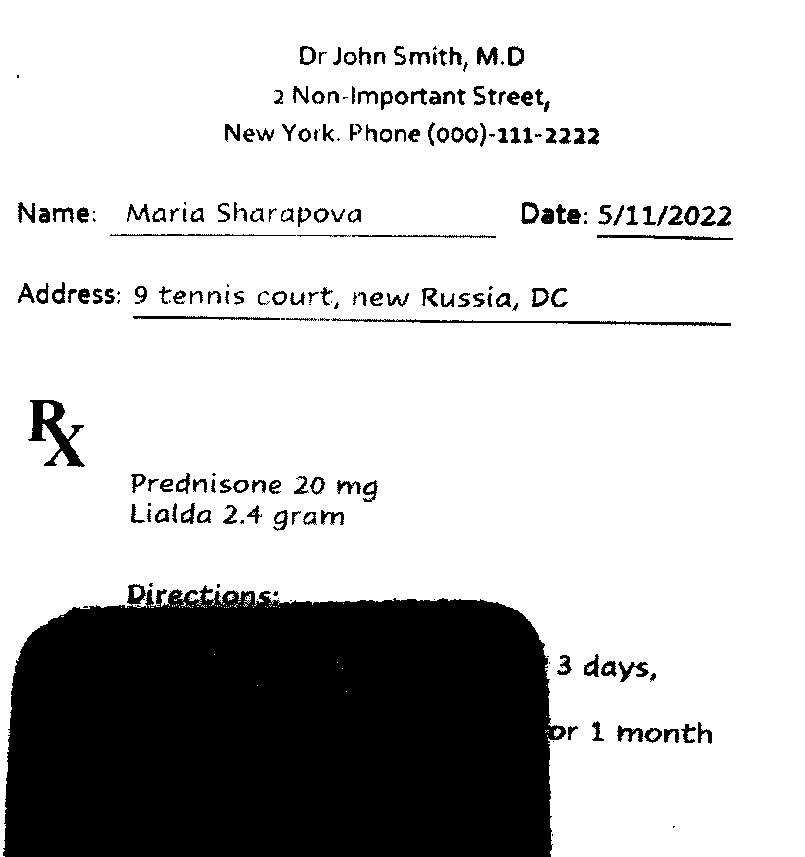

In [20]:
# Simple Thresholding - cause problems in case of images with inconsistent lighting

_, new_dark_img = cv2.threshold(dark_img, 150, 255, cv2.THRESH_BINARY)
Image.fromarray(new_dark_img)

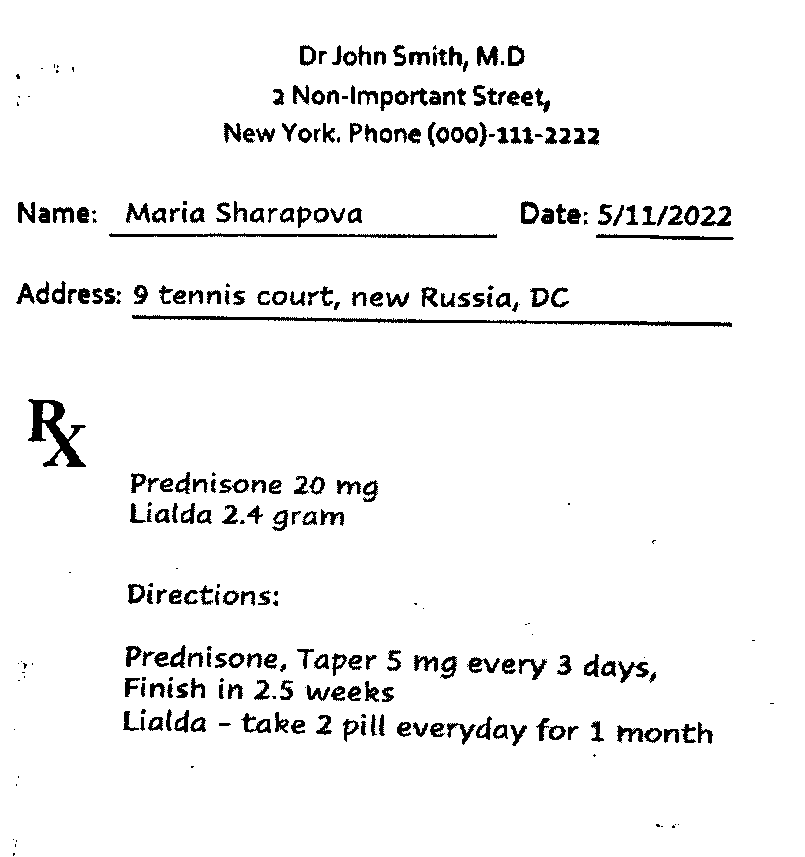

In [25]:
new_dark_img = cv2.adaptiveThreshold(
                        src=dark_img, 
                        maxValue=255,
                        adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                        thresholdType = cv2.THRESH_BINARY,
                        blockSize=61,
                        C=11)

Image.fromarray(new_dark_img)